In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected = True)
import plotly.graph_objs as go
import plotly.tools as tls
import warnings
from collections import Counter
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import KFold
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('C:/Users/user/Desktop/Porto_Seguro/train.csv')
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [3]:
rows = train.shape[0]
columns = train.shape[1]
print('The train dataset contains {0} rows and {1} columns'.format(rows, columns))

The train dataset contains 595212 rows and 59 columns


In [4]:
train.isnull().any().any()

False

In [5]:
train_copy = train
train_copy = train_copy.replace(-1, np.NaN)

<AxesSubplot:>

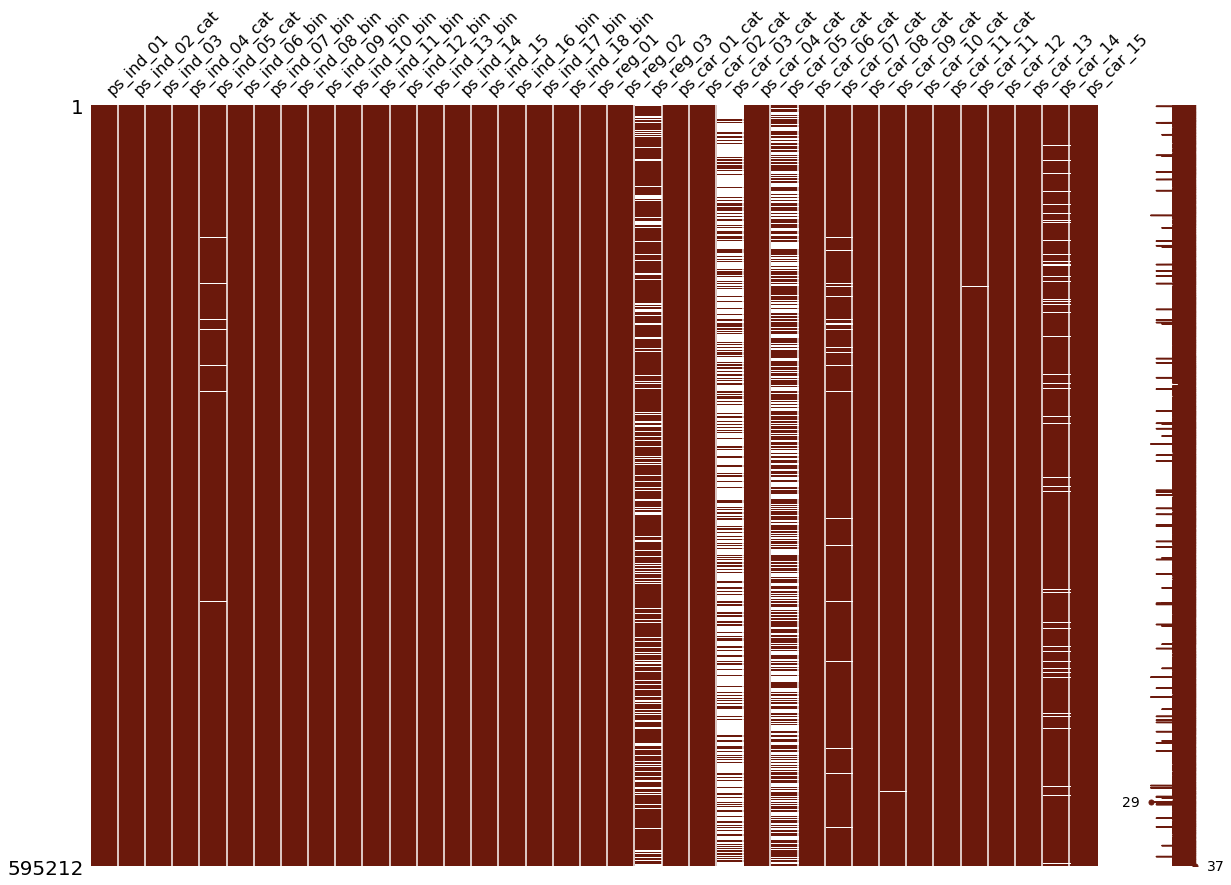

In [6]:
import missingno as msno
msno.matrix(df = train_copy.iloc[:,2:39], figsize = (20, 14), color = (0.42, 0.1, 0.05))

In [12]:
data = [go.Bar(
            x = train['target'].value_counts().index.values,
            y = train['target'].value_counts().values,
            text = 'Distribution of target variable'
    )]

layout = go.Layout(
    title = 'Target variable distribution'
)

fig = go.Figure(data = data, layout = layout)

py.iplot(fig, filename = 'basic - bar')

In [13]:
Counter(train.dtypes.values)

Counter({dtype('int64'): 49, dtype('float64'): 10})

In [14]:
train_float = train.select_dtypes(include = ['float64'])
train_int = train.select_dtypes(include = ['int64'])

<AxesSubplot:title={'center':'Pearson correlation of continuous features'}>

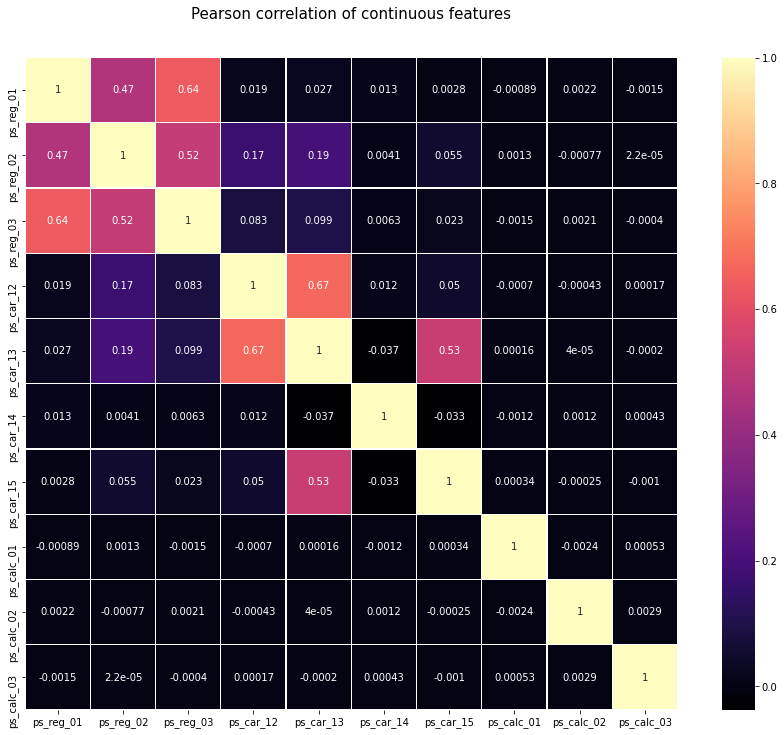

In [15]:
colormap = plt.cm.magma
plt.figure(figsize = (16, 12))
plt.title('Pearson correlation of continuous features', y = 1.05, size = 15)
sns.heatmap(train_float.corr(), linewidths = 0.1, vmax = 1.0, square = True, cmap = colormap, linecolor = 'white', annot = True)

In [21]:
data = [
    go.Heatmap(
        z = train_int.corr().values,
        x = train_int.columns.values,
        y = train_int.columns.values,
        colorscale = 'Viridis',
        reversescale = False,
        opacity = 1.0)
]

layout = go.Layout(
    title = 'Pearson Correlation of Integer-type features',
    xaxis = dict(ticks = '', nticks = 36),
    yaxis = dict(ticks = ''),
    width = 900, height = 700)

fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = 'labelled-heatmap')

In [22]:
mf = mutual_info_classif(train_float.values, train.target.values, n_neighbors = 3, random_state = 17)
print(mf)

[0.01402035 0.00431986 0.0055185  0.00778454 0.00157233 0.00197537
 0.01226    0.00553038 0.00545101 0.00562139]


In [23]:
bin_col = [col for col in train.columns if '_bin' in col]
zero_list = []
one_list = []

for col in bin_col:
    zero_list.append((train[col] == 0).sum())
    one_list.append((train[col] == 1).sum())

In [26]:
trace1 = go.Bar(
    x = bin_col,
    y = zero_list,
    name = 'Zero count')

trace2 = go.Bar(
    x = bin_col,
    y = one_list,
    name = 'One count')

data = [trace1, trace2]
layout = go.Layout(
    barmode = 'stack',
    title = 'Count of 1 and 0 in binary variables')

fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = 'stacked - bar')

In [28]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 150, max_depth = 8, min_samples_leaf = 4, max_features = 0.2, n_jobs = -1, random_state = 0)
rf.fit(train.drop(['id', 'target'], axis = 1), train.target)

features = train.drop(['id', 'target'], axis = 1).columns.values

print("-----Training Done-----")

-----Training Done-----


In [33]:
trace = go.Scatter(
    y = rf.feature_importances_,
    x = features,
    mode = 'markers',
    marker = dict(
            sizemode = 'diameter',
            sizeref = 1,
            size = 13,
            color = rf.feature_importances_,
            colorscale = 'Portland',
            showscale = True),
    text = features)

data = [trace]

layout = go.Layout(
    autosize = True,
    title = 'Random Forest Feature Importance',
    hovermode = 'closest',
    xaxis = dict(
            ticklen = 5,
            showgrid = False,
            zeroline = False,
            showline = False),
    
    yaxis = dict(
            title = 'Feature Importance',
            showgrid = False,
            zeroline = False,
            ticklen = 5,
            gridwidth = 2),
    showlegend = False)

fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = 'scatter2010')